In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-law-stats/judges_clean/judges_clean.csv
/kaggle/input/indian-law-stats/acts_sections/acts_sections.csv
/kaggle/input/indian-law-stats/cases/cases/cases_2015.csv
/kaggle/input/indian-law-stats/cases/cases/cases_2012.csv
/kaggle/input/indian-law-stats/cases/cases/cases_2018.csv
/kaggle/input/indian-law-stats/cases/cases/cases_2013.csv
/kaggle/input/indian-law-stats/cases/cases/cases_2017.csv
/kaggle/input/indian-law-stats/cases/cases/cases_2010.csv
/kaggle/input/indian-law-stats/cases/cases/cases_2014.csv
/kaggle/input/indian-law-stats/cases/cases/cases_2016.csv
/kaggle/input/indian-law-stats/cases/cases/cases_2011.csv
/kaggle/input/indian-law-stats/keys/keys/type_name_key.csv
/kaggle/input/indian-law-stats/keys/keys/cases_district_key.csv
/kaggle/input/indian-law-stats/keys/keys/act_key.csv
/kaggle/input/indian-law-stats/keys/keys/disp_name_key.csv
/kaggle/input/indian-law-stats/keys/keys/purpose_name_key.csv
/kaggle/input/indian-law-stats/keys/keys/cases_state_key.

In [2]:
dv_2010 = pd.read_csv("/kaggle/input/dv-cases-expanded-set/dom_vi_cases_2010_ex.csv")
dv_2011 = pd.read_csv("/kaggle/input/dv-cases-expanded-set/dom_vi_cases_2011_ex.csv")
dv_2012 = pd.read_csv("/kaggle/input/dv-cases-expanded-set/dom_vi_cases_2012_ex.csv")

In [3]:
dv_2013 = pd.read_csv("/kaggle/input/dv-cases-expanded-set/dom_vi_cases_2013_ex.csv")
dv_2014 = pd.read_csv("/kaggle/input/dv-cases-expanded-set/dom_vi_cases_2014_ex.csv")
dv_2015 = pd.read_csv("/kaggle/input/dv-cases-expanded-set/dom_vi_cases_2015_ex.csv")

In [4]:
dv_2016 = pd.read_csv("/kaggle/input/dv-cases-expanded-set/dom_vi_cases_2016_ex.csv")

In [5]:
total_case_counts = pd.read_csv("/kaggle/input/dv-cases-expanded-set/cases_registered_data .csv")

In [6]:
years = [2010,2011,2012,2013,2014,2015,2016]

In [7]:
dv_case_counts_dict = {
    "Year": years,
    "DV_Count": [dv_2010["ddl_case_id"].count(),dv_2011["ddl_case_id"].count(),
                dv_2012["ddl_case_id"].count(),dv_2013["ddl_case_id"].count(),
                dv_2014["ddl_case_id"].count(),dv_2015["ddl_case_id"].count(),
                dv_2016["ddl_case_id"].count()]
}

In [8]:
dv_case_counts = pd.DataFrame(dv_case_counts_dict)

<AxesSubplot:xlabel='Year'>

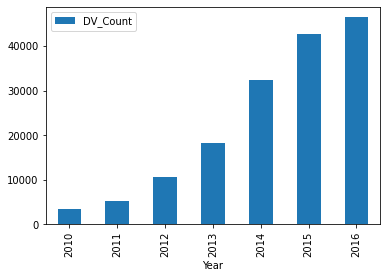

In [9]:
dv_case_counts.plot.bar(x = "Year")

<AxesSubplot:xlabel='Year'>

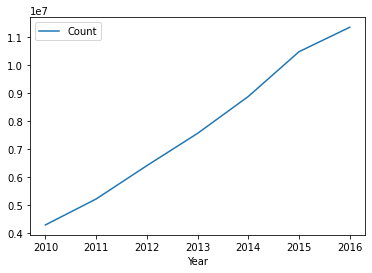

In [10]:
total_case_counts.plot.line(x="Year", y="Count")

In [11]:
from sklearn import preprocessing

In [12]:
dv_values = dv_case_counts["DV_Count"].values

In [13]:
total_values = total_case_counts["Count"].values

In [14]:
percent_dv_values = []
for i in range(len(dv_values)):
    percent_dv_values.append(dv_values[i]/total_values[i] * 100)

percent_dv_values

[0.0799518467054724,
 0.10244491234106017,
 0.16605780886494667,
 0.24098627550867124,
 0.3647031037737295,
 0.40801361146313686,
 0.40963904254550515]

In [15]:
import numpy as np

In [16]:
min_max_scaler = preprocessing.MinMaxScaler()
dv_values_scaled = min_max_scaler.fit_transform(np.array(percent_dv_values).reshape(-1,1))
dv_values_scaled

array([[0.        ],
       [0.06822548],
       [0.26117472],
       [0.48844611],
       [0.86370129],
       [0.99506978],
       [1.        ]])

# Total Cases VS DV Cases Registered: By Number

In [17]:
import matplotlib.pyplot as plt

<AxesSubplot:>

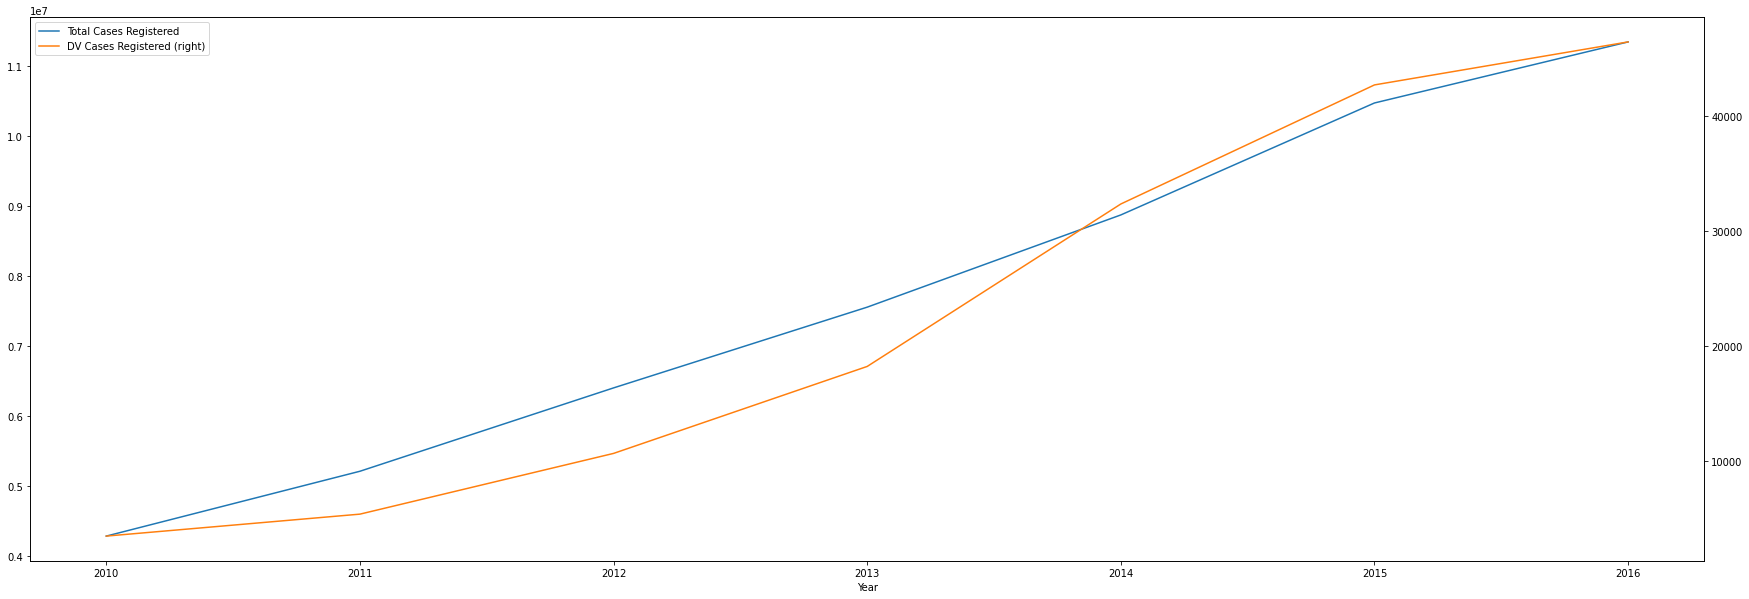

In [18]:
fig, ax = plt.subplots(figsize=(30,10)) 

comb_data = {
    "Year": years,
    "Total Cases Registered": total_values,
    "DV Cases Registered": dv_values
}

comb_df = pd.DataFrame(comb_data)
comb_df

comb_df.plot(x= "Year", y= "Total Cases Registered", ax=ax)

comb_df.plot(x= "Year", y= "DV Cases Registered", ax=ax, secondary_y=True)

# Total Cases VS DV Cases as % of Total Cases

<AxesSubplot:>

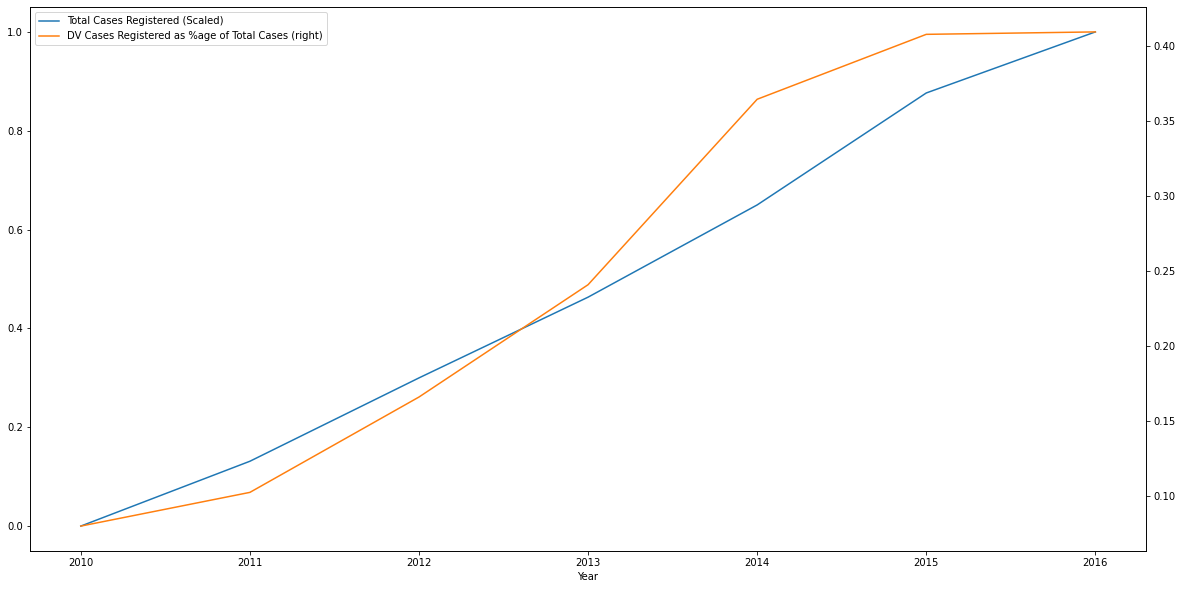

In [19]:
fig, ax = plt.subplots(figsize=(20,10)) 

total_values_scaled = min_max_scaler.fit_transform(np.array(total_values).reshape(-1,1))
total_values_scaled

def util(x):
    return x[0]

total_values_scaled = list(map(util,total_values_scaled))
total_values_scaled

comb_data = {
    "Year": years,
    "Total Cases Registered (Scaled)": total_values_scaled,
    "DV Cases Registered as %age of Total Cases": percent_dv_values
}
comb_df = pd.DataFrame(comb_data)

comb_df.plot(x= "Year", y= "Total Cases Registered (Scaled)", ax=ax)

comb_df.plot(x= "Year", y= "DV Cases Registered as %age of Total Cases", ax=ax, secondary_y = True)

# Total Vs DV Cases: Percent Increase from Prev Year

In [20]:
dv_values_percent_inc = []
for i in range(len(dv_values)-1,0,-1):
    dv_values_percent_inc.append(((dv_values[i]-dv_values[i-1])/dv_values[i-1]) *100)
dv_values_percent_inc.append(0)
dv_values_percent_inc.reverse()
dv_values_percent_inc

[0,
 55.886649138182875,
 99.19415292353823,
 71.30492050051745,
 77.75702987697716,
 32.06142248038065,
 8.768687270430247]

In [21]:
total_values_percent_inc = []
for i in range(len(dv_values)-1,0,-1):
    total_values_percent_inc.append(((total_values[i]-total_values[i-1])/total_values[i-1]) *100)
total_values_percent_inc.append(0)
total_values_percent_inc.reverse()
total_values_percent_inc

[0,
 21.65977978323076,
 22.88749125733659,
 18.04207391501946,
 17.457197737788984,
 18.043146880946736,
 8.337097537236982]

<AxesSubplot:xlabel='Year'>

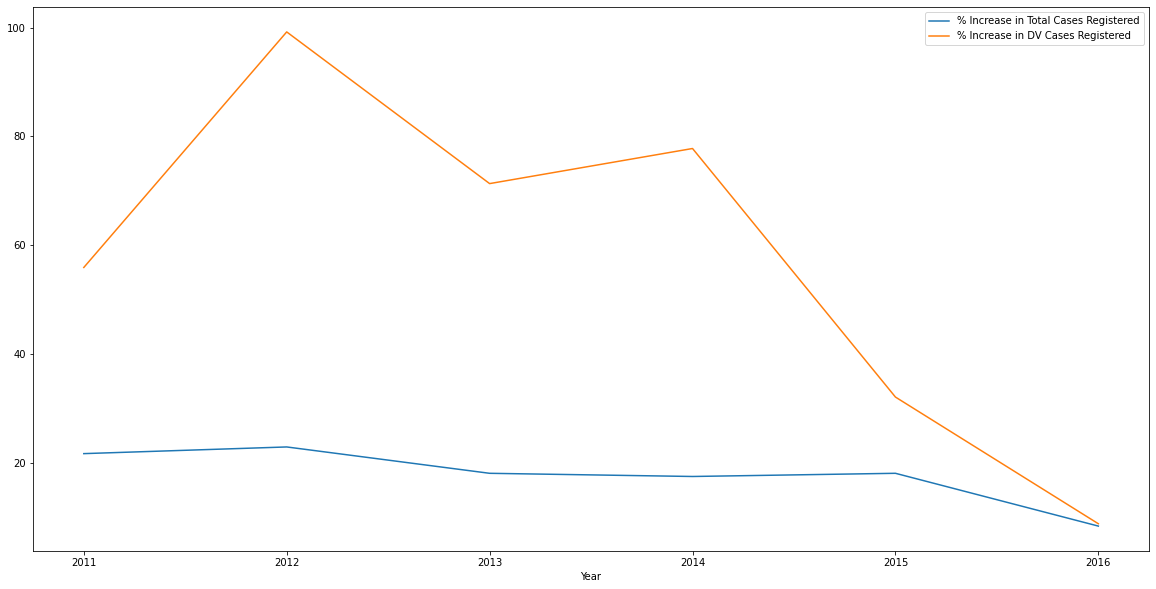

In [22]:
fig, ax = plt.subplots(figsize=(20,10)) 

comb_data = {
    "Year": years[1:],
    "% Increase in Total Cases Registered": total_values_percent_inc[1:],
    "% Increase in DV Cases Registered": dv_values_percent_inc[1:]
}
comb_df = pd.DataFrame(comb_data)

comb_df.plot(x= "Year", y= "% Increase in Total Cases Registered", ax=ax)

comb_df.plot(x= "Year", y= "% Increase in DV Cases Registered", ax=ax)

^ DV against women shows the same trend (show)

# Disposition Analysis

We now turn our attention to convictions in cases under the PoWDV Act.
We will analyse whether the nirbhaya incident had a significant impact on conviction of both men and women

In [23]:
dfs_temp = [dv_2010,dv_2011,dv_2012,dv_2013,dv_2014,dv_2015,dv_2016]

In [24]:
disp_code_keys_df = pd.read_csv("/kaggle/input/indian-law-stats/keys/keys/disp_name_key.csv")
disp_convicted_keys_df = disp_code_keys_df[disp_code_keys_df["disp_name_s"] == "convicted"]
disp_convicted_keys_df

,year,disp_name,disp_name_s,count
18,2010,19,convicted,145668
69,2011,19,convicted,171397
120,2012,19,convicted,220785
171,2013,19,convicted,327840
222,2014,19,convicted,397669
273,2015,19,convicted,455331
325,2016,20,convicted,432004
377,2017,20,convicted,474365
429,2018,20,convicted,416122


In [25]:
disp_code_keys = disp_convicted_keys_df["disp_name"].values

In [26]:
conviction_disp_codes = disp_code_keys.tolist()
conviction_disp_codes

[19, 19, 19, 19, 19, 19, 20, 20, 20]

## Part One: Looking at Conviction Rates


In [27]:
dfs = []
i = 0
for df in dfs_temp:
    df_to_add = df[(df["disp_name"] == conviction_disp_codes[i])]
    i+=1
    dfs.append(df_to_add)

In [28]:
conviction_counts = [df["ddl_case_id"].count() for df in dfs]
conviction_counts

[8, 80, 31, 14, 20, 28, 19]

In [29]:
total_counts = [df["ddl_case_id"].count() for df in dfs_temp]
total_counts

[3423, 5336, 10629, 18208, 32366, 42743, 46491]

In [30]:
comb_data = {
    "Year": years,
    "DV Cases Registered": total_counts,
    "Num of Convictions": conviction_counts
}

In [31]:
comb_df = pd.DataFrame(comb_data)

<AxesSubplot:>

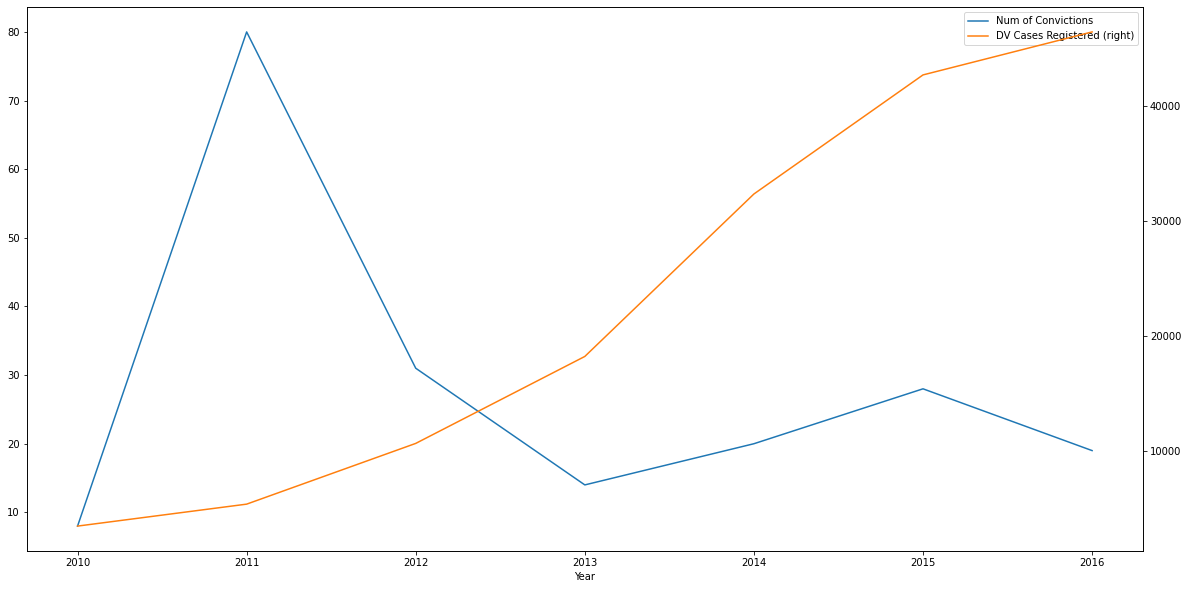

In [32]:
fig, ax = plt.subplots(figsize=(20,10)) 

comb_df.plot(x="Year", y="Num of Convictions", ax=ax)

comb_df.plot(x="Year", y="DV Cases Registered", ax=ax,secondary_y = True)

## Conviction Rates down, so what exactly happens in the court?

In [33]:
disp_codes_grouped = []
for i in range(7):
    temp = disp_code_keys_df[disp_code_keys_df.year == int(f"201{i}")][["disp_name","disp_name_s"]]
    disp_codes_grouped.append(temp)

In [34]:
disp_codes_grouped[6]

,disp_name,disp_name_s
306,1,258 crpc
307,2,abated
308,3,absconded
309,4,acquitted
310,5,allowed
311,6,appeal accepted
312,7,award
313,8,bail granted
314,9,bail order
315,10,bail refused


In [35]:
dfs_disp_temp = []
for i in range(7):
    dfs_disp_temp.append(pd.merge(dfs_temp[i], disp_codes_grouped[i], on="disp_name"))

In [36]:
disposition_df = disp_code_keys_df.groupby("disp_name_s")["year"].count()

In [37]:
for i,df in enumerate(dfs_disp_temp):
    disposition_df = pd.merge(disposition_df, df.groupby("disp_name_s")[["ddl_case_id"]].count(), on="disp_name_s", how="left")
    disposition_df.rename(columns={"ddl_case_id":f"201{i}"},inplace=True)

disposition_df.drop("year", axis="columns", inplace=True)
disposition_df["total"] = disposition_df.sum(axis = 1)

In [38]:
disposition_df.sort_values(by="total", ascending=False)

,2010,2011,2012,2013,2014,2015,2016,total
disp_name_s,,,,,,,,
disposition var missing,250.0,502.0,959.0,2079.0,5476.0,10171.0,17688.0,37125.0
dismissed,423.0,1096.0,2012.0,3211.0,5665.0,7212.0,6410.0,26029.0
withdrawn,157.0,374.0,908.0,1895.0,4567.0,5529.0,5419.0,18849.0
disposed-otherwise,371.0,606.0,1462.0,2373.0,2912.0,2953.0,1852.0,12529.0
allowed,158.0,306.0,572.0,928.0,2157.0,3098.0,3048.0,10267.0
judgement,314.0,538.0,1445.0,2419.0,2622.0,1991.0,838.0,10167.0
disposed,74.0,363.0,307.0,509.0,1605.0,2398.0,2216.0,7472.0
compromise,113.0,256.0,535.0,894.0,1454.0,1644.0,1616.0,6512.0
reject,118.0,236.0,705.0,1168.0,1312.0,1182.0,666.0,5387.0


In [39]:
disp_norm_df = disposition_df.copy()

In [40]:
total_counts

[3423, 5336, 10629, 18208, 32366, 42743, 46491]

In [41]:
for i,total in enumerate(total_counts):
    disp_norm_df[f"201{i}"] = (disposition_df[f"201{i}"]/total)*100

In [42]:
disp_norm_df.sort_values(by="total", ascending=False).head(10)

,2010,2011,2012,2013,2014,2015,2016,total
disp_name_s,,,,,,,,
disposition var missing,7.303535,9.407796,9.022486,11.418058,16.918989,23.795709,38.046073,37125.0
dismissed,12.357581,20.539730,18.929344,17.635105,17.502935,16.872938,13.787615,26029.0
withdrawn,4.586620,7.008996,8.542666,10.407513,14.110486,12.935451,11.656019,18849.0
disposed-otherwise,10.838446,11.356822,13.754822,13.032733,8.997096,6.908734,3.983567,12529.0
allowed,4.615834,5.734633,5.381503,5.096661,6.664401,7.247970,6.556108,10267.0
judgement,9.173240,10.082459,13.594882,13.285369,8.101094,4.658073,1.802499,10167.0
disposed,2.161846,6.802849,2.888324,2.795475,4.958907,5.610275,4.766514,7472.0
compromise,3.301198,4.797601,5.033399,4.909930,4.492369,3.846244,3.475942,6512.0
reject,3.447268,4.422789,6.632797,6.414763,4.053637,2.765365,1.432535,5387.0


<AxesSubplot:ylabel='total'>

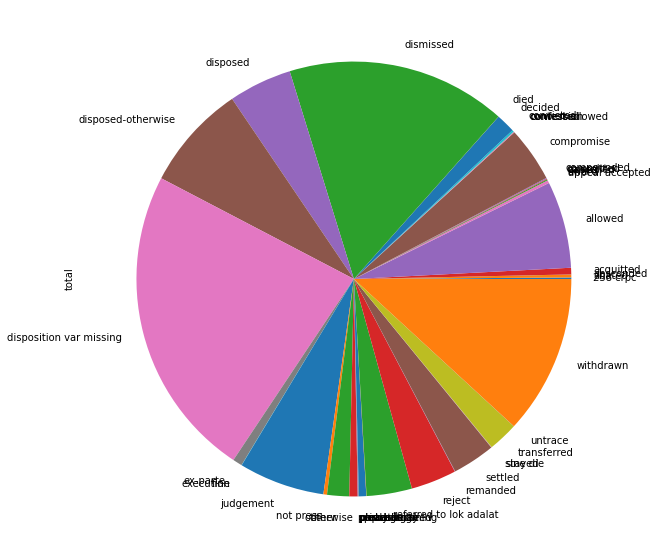

In [43]:
disp_norm_df.plot.pie(y = "total", figsize=(20,10), legend=False)

As we can see below, most of the cases being fought under the Domestic Violence Act have not even reached a disposition. And this is an upward trend.

In [44]:
disp_no_var_cases = disposition_df.sort_values(by="total", ascending=False)[:1]
disp_no_var_cases.drop("total", axis="columns", inplace=True)

### Plot: Number of unsolved domestic violence cases per year

<AxesSubplot:>

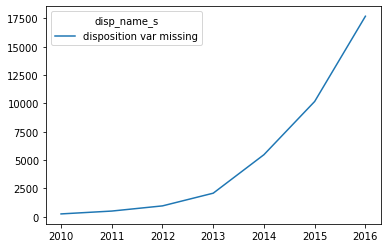

In [45]:
disp_no_var_cases.T.plot.line()

As excpected, with the number of total domestic violence cases being registered, and these kind of cases taking a long time to reach disposition, the number of unsolved court cases shows an increasing trend.

In [46]:
disp_no_var_cases_percent_inc = pd.DataFrame()
for i in range(1,7):
    disp_no_var_cases_percent_inc[f"201{i}"] = 100*((disp_no_var_cases[f"201{i}"] - disp_no_var_cases[f"201{i-1}"]) / disp_no_var_cases[f"201{i-1}"]) 
    

<AxesSubplot:>

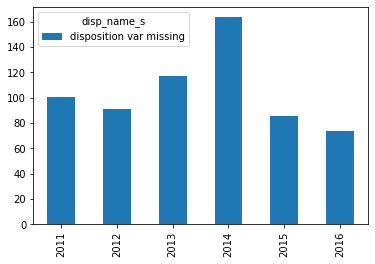

In [47]:

disp_no_var_cases_percent_inc.T.plot.bar()

AS we can see, the graph is mostly stable and indicates that the number of unsolved cases nearly doubled every year from 2011-2013. Coming to the year 2014, this year shows an anomaly, with a 163% increase in unsolved court cases over the previous year. The following two years, 2015 and 2016 showed trends similar to the early years, with the number growing by just under two times both years.

Still we see that the years with the most increase in unsolved domestic violence are the two years directly following the Nirbhaya incident.

Now, we compare them alongside the total number of domestic violence cases registered every year.

In [48]:
disp_no_var_cases.values

array([[  250.,   502.,   959.,  2079.,  5476., 10171., 17688.]])

<AxesSubplot:xlabel='Year'>

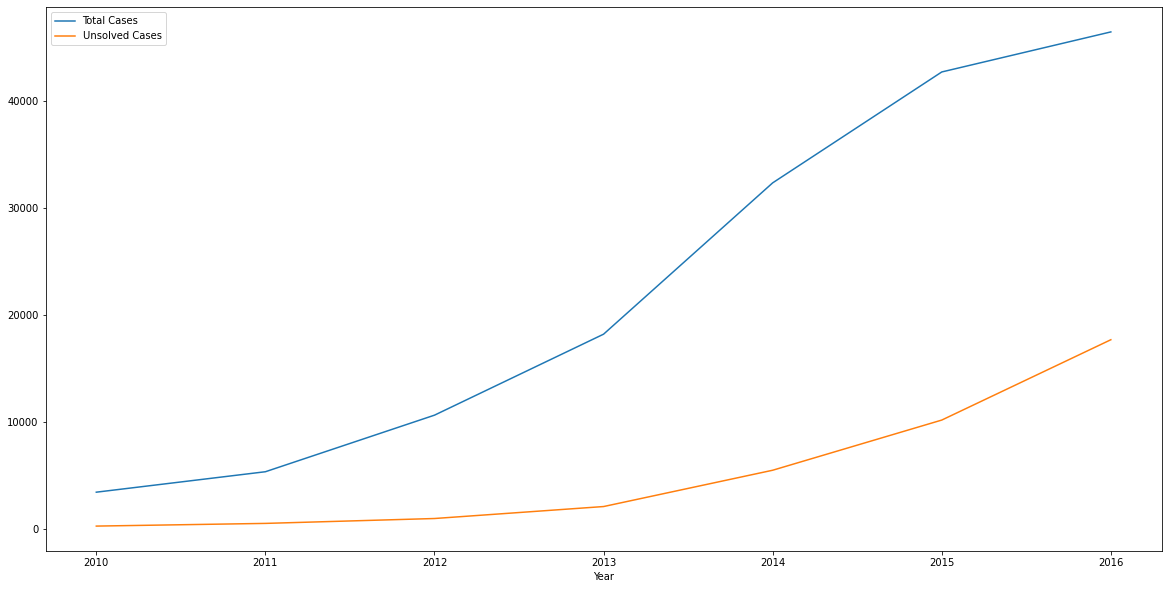

In [49]:
fig, ax = plt.subplots(figsize=(20,10)) 
comb_data = {
    "Year": years,
    "Total Cases": total_counts,
    "Unsolved Cases": disp_no_var_cases.iloc[0].values
}
comb_df = pd.DataFrame(comb_data)

comb_df.plot(x="Year", y="Total Cases", ax=ax)
comb_df.plot(x="Year", y="Unsolved Cases", ax=ax)

In [50]:
percent_vals = disp_norm_df.sort_values(by="total",ascending=False).iloc[0].values

In [51]:
percent_vals = percent_vals[:-1]

In [52]:
percent_vals

array([ 7.30353491,  9.4077961 ,  9.02248565, 11.418058  , 16.91898906,
       23.79570924, 38.04607343])

<AxesSubplot:xlabel='Year'>

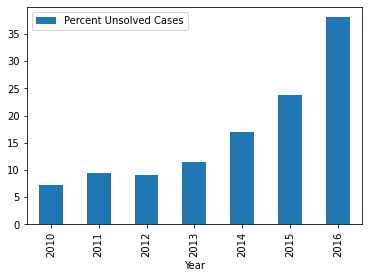

In [53]:
comb_df = pd.DataFrame({"Year": years, "Percent Unsolved Cases":percent_vals})
comb_df.plot.bar(x="Year",y="Percent Unsolved Cases")

As we can see in the period of 2010 to 2012, the percent of unsolved cases is fairly constant and under 10%. But from 2013 to 2016 we see a jump from 11% to 38% in unsolved cases. From this we can infer 2 possibilities:
1. More cases in recent years are unsolved because they've been in court discussion for less time OR,
2. The time to solve domestic violence cases has increased over the years

Let us explore the latter possibility.

In [54]:
mean_solving_time = []

In [55]:
for df in dfs_disp_temp:
    working = df[df.disp_name_s != "disposition var missing"]
    working = working[["date_first_list","date_of_decision"]]
    date_first_list = pd.to_datetime(working["date_first_list"][working.date_first_list.notnull()].values)
    date_decision_list =  pd.to_datetime(working["date_of_decision"][working.date_first_list.notnull()].values)
    
    dates_df = pd.DataFrame({
        "start date": date_first_list,
        "end date": date_decision_list
    })
    dates_df["difference"] = dates_df["end date"] - dates_df["start date"]
    mean_solving_time.append(dates_df["difference"].mean() / np.timedelta64(1,"D"))

<AxesSubplot:xlabel='Year', ylabel='days'>

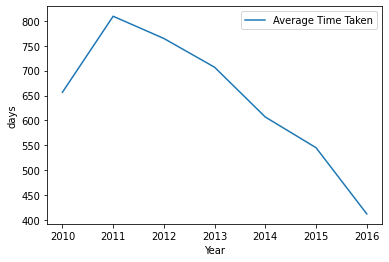

In [56]:
solving_df = pd.DataFrame({
    "Year": years,
    "Average Time Taken": mean_solving_time
})
solving_df.plot(x="Year", y="Average Time Taken", ylabel="days")

As we can see, initally, from 2010 to 2011, there is a rise of about 200 days in the average time taken to solve a domestic violence case. But, remarkably, since then, the average time taken to solve such cases shows a steady downward trend, with cases in 2016 on average being solved in just about half the time it took on average cases in 2011 to solve!

# Conclusion

We can conclude that there are multiple differences between domestic violence cases after the Nirbhaya incident and before.

The key insights being:
- The total number of domestic violence cases, and domestic violence cases as %age of cases increased, and the number of cases grew every year at a constant rate.

- Surprisingly, number of convictions decreased as the number of cases increased every year. This prompted an analysis into the disposition being made in these cases

- The number of unsolved cases, initially constant, shows an upward trend since 2013

- Average time to solve a domestic violence case shows a downward trend through the years